# Making a Baseline model

For the baseline model we will use a Logistic Regression algorithm
- We will import the dataset and drop the unwanted columns that we did in the EDA notebook
- Then we will partition the target variable 'Exited' from the rest of the dataset

In [1058]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import RandomOverSampler
# from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [1059]:
df = pd.read_csv('../data/finalized_customer_churn_records.csv')
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,...,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,1,...,464,1,0,0,1,0,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,...,456,0,0,1,1,0,1,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,...,377,1,0,0,1,0,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,...,350,1,0,0,1,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,...,425,0,0,1,1,0,0,1,0,0


In [1060]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Age                 10000 non-null  int64  
 2   Tenure              10000 non-null  int64  
 3   Balance             10000 non-null  float64
 4   NumOfProducts       10000 non-null  int64  
 5   HasCrCard           10000 non-null  int64  
 6   IsActiveMember      10000 non-null  int64  
 7   EstimatedSalary     10000 non-null  float64
 8   Exited              10000 non-null  int64  
 9   Complain            10000 non-null  int64  
 10  Satisfaction Score  10000 non-null  int64  
 11  Point Earned        10000 non-null  int64  
 12  Geography_France    10000 non-null  int64  
 13  Geography_Germany   10000 non-null  int64  
 14  Geography_Spain     10000 non-null  int64  
 15  Gender_Female       10000 non-null  int64  
 16  Gende

In [1061]:
#selecting the target feature
exited = df['Exited'].values

#dropping the target variable from the dataset
df.drop(labels='Exited', axis=1, inplace=True)
df.head()



,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,2,464,1,0,0,1,0,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,1,3,456,0,0,1,1,0,1,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,3,377,1,0,0,1,0,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,5,350,1,0,0,1,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,5,425,0,0,1,1,0,0,1,0,0


### Split dataset into training and testing sets

In [1062]:
#setting randome_state and splitting the dataset into training and test sets

RANDOM_STATE = 3

X_train, X_test, y_train, y_test = train_test_split(df, exited, test_size=.30, stratify=exited, random_state=RANDOM_STATE)

print(
    f'X_train size: {X_train.shape}\ny_train size: {y_train.shape}\nX_test size: {X_test.shape}\ny_test size: {y_test.shape}'
)

X_train size: (7000, 20)
y_train size: (7000,)
X_test size: (3000, 20)
y_test size: (3000,)


## Logistic Regression model implementation

We import the LogisticRegression model, instantiate the model, fit the model to our training set, and then make predictions on the testing set

In [1063]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logreg = LogisticRegression(random_state=RANDOM_STATE)

%time
logreg.fit(X_train, y_train)



CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 12.9 µs


LogisticRegression(random_state=3)

In [1064]:
logreg_pred = logreg.predict(X_test[:20])
true_labels = y_test[:20]
# print(f'Predictions:\n{list(logreg_pred)}\n')
# print(f'Ground truth labels:\n{true_labels}')

In [1065]:
predictions_df = pd.DataFrame({
    'Actual_label': true_labels,
    'Predictions': logreg_pred
})

predictions_df.head(40)

,Actual_label,Predictions
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,1,1
9,0,0


### Scoring

In [1066]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = logreg.predict(X_test)

print(classification_report(y_test, y_pred))
print()
# print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2389
           1       1.00      1.00      1.00       611

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000




The classification report shows an accuracy of 1.00, a precision score of 1.00, a recall score of 1.00, and an f-1 score of 1.00. Since it is drastically more expensive to gain new customers as it is to retain existing customers, the metrics we use in determining the strength of the model will be critical. With this being said the metric(s) to use will be the recall and f-1 score, because of the need to accurately predict the true positive rate or in this case the people who are accurately predicted to exit the bank. In this case the logistic regression model predicted very low false positives and false negatives - 1 and 3, respectively.

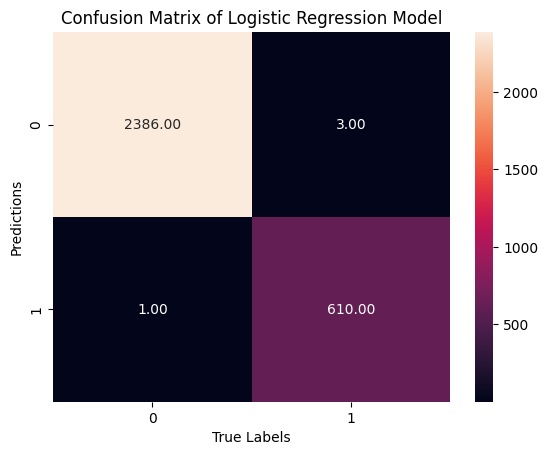

In [1067]:
import seaborn as sns
import matplotlib.pyplot as plt

confusion_matrix_ = confusion_matrix(y_test, y_pred)

sns.heatmap(data=confusion_matrix_, annot=True, fmt='.2f')
plt.xlabel('True Labels')
plt.ylabel('Predictions')
plt.title('Confusion Matrix of Logistic Regression Model')
plt.show()

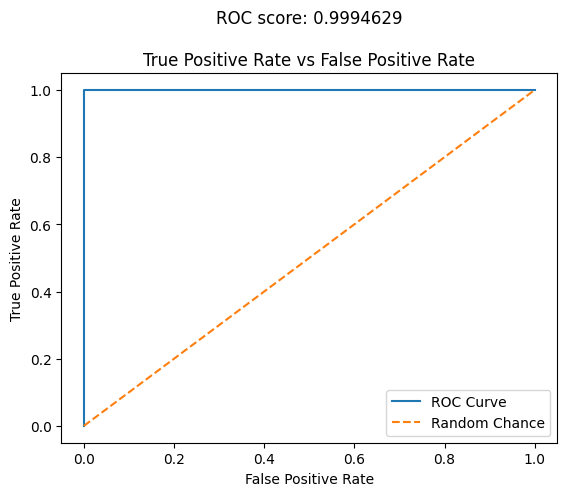

In [1068]:
from sklearn.metrics import roc_auc_score, roc_curve

y_prob = logreg.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label='ROC Curve')
plt.plot((0, 1), linestyle='--', label='Random Chance')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC score: {round(roc_auc_score(y_test, y_prob),8)}\n\nTrue Positive Rate vs False Positive Rate')
plt.show()

The above two graphs show predicted values and true values in a confusion matrix and in an ROC curve. 
* The confusion matrix shows true negatives in the top left corner and the true positive values in the bottom corner
* The next graph shows an ROC score of ~.99, meaning that at a 0 false positive rate will yield a ~99% chance that the model will predict a true positive value

## K-Nearest Neighbors experamentation

The target variable 'Exited' has been shown in the EDA as well as below that the people who have not exited the bank heavily outnumber the people who have in fact left the bank (~4-to-1 ratio). Since those are the people who we are needing to target so as to retain them as customers we will try an over sampling technique to see if the model's metrics change with the mutation of our target variable.

# I commented the below section because I realized that by stratifying the target variable in the train test split I would not need to do so with a RandomOverSample technique??????

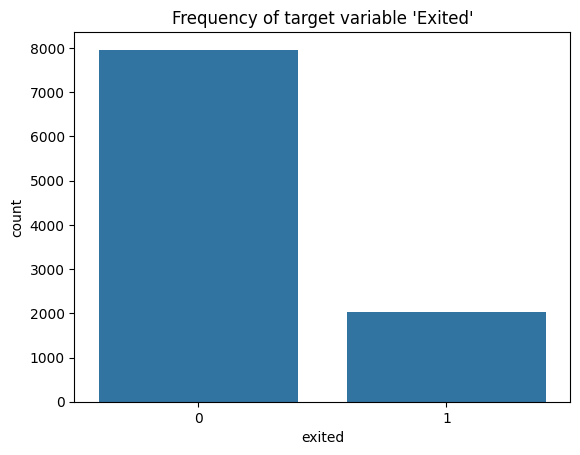

In [1069]:
# exited_df = pd.DataFrame({'exited': exited})
# # print(exited)

# sns.countplot(data=exited_df, x='exited')
# plt.title("Frequency of target variable 'Exited'")
# plt.show()

In [1070]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# over_sampler = RandomOverSampler(sampling_strategy='minority')
# df, exited = over_sampler.fit_resample(df, exited)

X_train, X_test, y_train, y_test = train_test_split(df, exited, test_size=0.30, stratify=exited, random_state=RANDOM_STATE)

print(f'X_train shape: {X_train.shape}\nX_test shape: {X_test.shape}\ny_train shape: {y_train.shape}\ny_test shape: {y_test.shape}')

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


X_train shape: (7000, 20)
X_test shape: (3000, 20)
y_train shape: (7000,)
y_test shape: (3000,)


Below, we can see the over-sampling technique has matched the frequency of people who have exited the bank with the people who did not exit

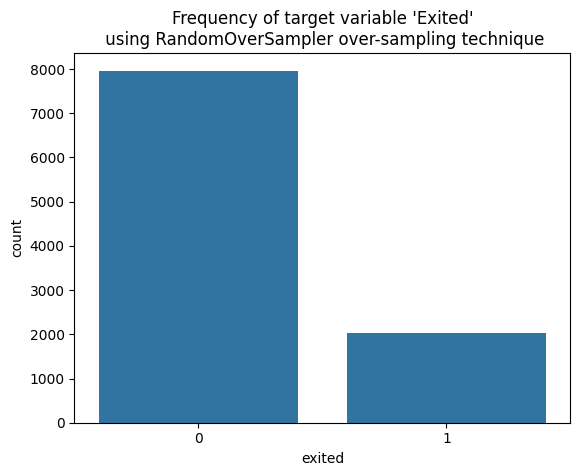

In [1071]:
# exited_df = pd.DataFrame({'exited': exited})
# # print(exited)

# sns.countplot(data=exited_df, x='exited')
# plt.title("Frequency of target variable 'Exited'\n using RandomOverSampler over-sampling technique")
# plt.show()

## Basic KNN model
* To start off with we will run a standard KNN model to see what kind of scores it gives us
* From there we can hyper-parameter tune later

In [1072]:
knn = KNeighborsClassifier()

%time
knn.fit(X_train_scaled, y_train)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.01 µs


KNeighborsClassifier()

In [1073]:
knn_preds = knn.predict(X_test_scaled)
print(f'KNN predictions:\n{list(knn_preds[:20])}\n')
print(f'Ground truth labels:\n{list(y_test[:20])}\n\n')

# print(confusion_matrix(y_test, knn_preds))
print(classification_report(y_test, knn_preds))

KNN predictions:
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1]

Ground truth labels:
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2389
           1       1.00      0.99      0.99       611

    accuracy                           1.00      3000
   macro avg       1.00      0.99      0.99      3000
weighted avg       1.00      1.00      1.00      3000



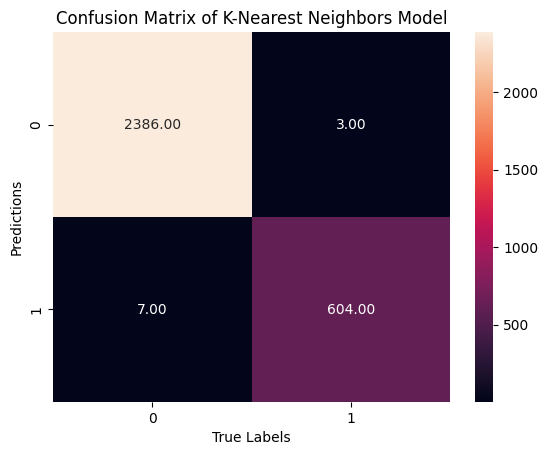

In [1074]:
sns.heatmap(data=confusion_matrix(y_test, knn_preds), fmt='.2f', annot=True)
plt.xlabel('True Labels')
plt.ylabel('Predictions')
plt.title('Confusion Matrix of K-Nearest Neighbors Model')
plt.show()

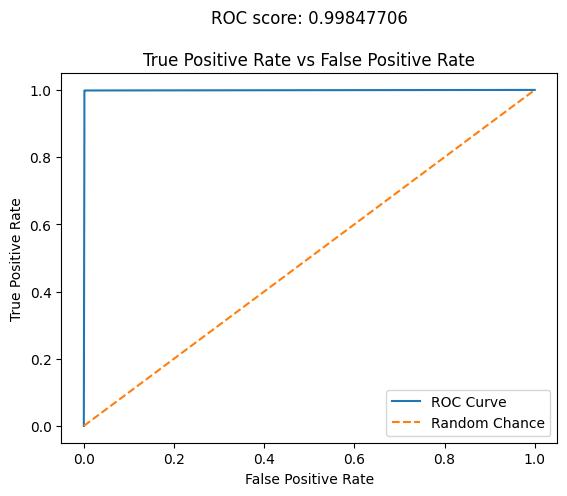

In [1075]:
y_prob = knn.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label='ROC Curve')
plt.plot((0, 1), linestyle='--', label='Random Chance')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC score: {round(roc_auc_score(y_test, y_prob),8)}\n\nTrue Positive Rate vs False Positive Rate')
plt.show()

In [1076]:
print(knn.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [1077]:
import pickle

with open('../final_models/knn_model.pkl', 'wb') as knn_model:
    pickle.dump(knn, knn_model)

In [1078]:
####### initial hyper-parameter fitting

# params = {
#     'n_neighbors': [5,6,7],
#     'leaf_size': [26,28,30,32],
#     'algorithm': ['auto', 'ball_tree', 'kd_tree'],
#     'weights': ['distance', 'uniform'],
#     'p': [5,6,7]
# }

# knn_grid = GridSearchCV(estimator=knn, param_grid=params, verbose=2, cv=5, n_jobs=-1, scoring=['f1_weighted', 'recall_macro'], refit='f1_weighted')

# knn_grid.fit(X_train_scaled, y_train)

In [1079]:

# print(f'KNN best params:\n{knn_grid.best_params_}\n')

Above, the best parameters of our first run are given and below we will use some of those parameters to fit the model twice more. Such as n_neighbors = 6, leaf_size will be lowered to a bottom range, and p will be set to an upper range.

In [1080]:
# params = {
#     'n_neighbors': [6],
#     'leaf_size': [4,5,6,7],
#     'algorithm': ['auto', 'ball_tree', 'kd_tree'],
#     'weights': ['distance', 'uniform'],
#     'p': [7,8,9]
# }

# knn_grid = GridSearchCV(estimator=knn, param_grid=params, verbose=1, cv=5, n_jobs=-1, scoring=['f1_weighted', 'recall_macro'], refit='f1_weighted')

# knn_grid.fit(X_train_scaled, y_train)

In [1081]:
# print(f'KNN best params:\n{knn_grid.best_params_}\n')

In [1082]:
# params = {
#     'n_neighbors': [6],
#     'leaf_size': [5],
#     'algorithm': ['auto'],
#     'weights': ['distance'],
#     'p': [7]
# }

# knn_grid = GridSearchCV(estimator=knn, param_grid=params, verbose=2, cv=5, n_jobs=-1, scoring=['f1_weighted', 'recall_macro'], refit='f1_weighted')

# %time
# knn_grid.fit(X_train_scaled, y_train)

In [1083]:
# knn_pred = knn_grid.predict(X_test_scaled)
# print(f'KNN predictions:\n{list(knn_pred[:20])}\n')
# print(f'Ground truth labels:\n{list(y_test[:20])}')

In [1084]:
# print(classification_report(y_test, knn_pred))

With the hyper-parameter tuning done we can see that the scoring has gotten better. A recall score of 0.79 > 0.68 and an f1-score of 0.78 > 0.67.

In [1085]:
# knn_confusion_matrix = confusion_matrix(y_test, knn_pred)
# print(knn_confusion_matrix)

In [1086]:
# sns.heatmap(data=knn_confusion_matrix, fmt='.2f', annot=True)
# plt.xlabel('True Labels')
# plt.ylabel('Predictions')
# plt.title('Confusion Matrix of K-Nearest Neighbors Model')
# plt.show()

In [1087]:
# y_prob = knn_grid.predict_proba(X_test_scaled)[:, 1]

# fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# plt.plot(fpr, tpr, label='ROC Curve')
# plt.plot((0, 1), linestyle='--', label='Random Chance')
# plt.legend()
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title(f'ROC score: {round(roc_auc_score(y_test, y_prob),8)}\n\nTrue Positive Rate vs False Positive Rate')
# plt.show()

As well as better scoring metrics we also see a wonderful ROC score of ~0.95, which is better than the ~0.83 from the logistic regression model. A good baseline has been set for future model exploration.